In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from utils import get_snr_gamma, get_snr_periodic

In [2]:
FNAMES = [
    "fouttau_snr_4096_500us.txt",
    "fouttau_snr_256_500us.txt",
]

LABELS = [
    "4096 neurons",
    "256 neurons",
]

# FNAMES = [
#     "fouttau_snr_256_125us.txt",
#     "fouttau_snr_256_250us.txt",
#     "fouttau_snr_256_500us.txt",
#     "fouttau_snr_256_1000us.txt",
#     "fouttau_snr_256_2000us.txt",
# ]
# LABELS = [
#     "125us tau",
#     "250us tau",
#     "500us tau",
#     "1000us tau",
#     "2000us tau",
# ]

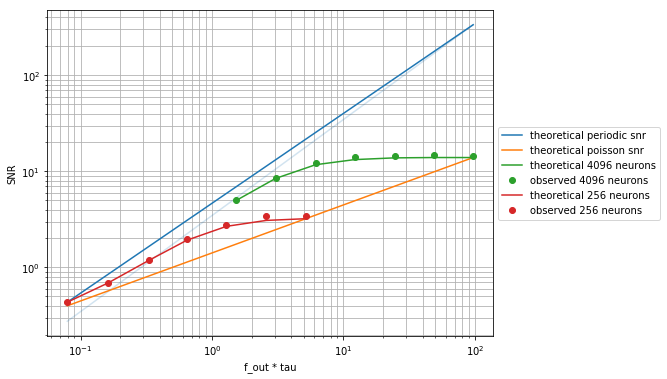

In [3]:
def plot_data(fnames, labels):
    fouttau = []
    snr = []
    ftmin = None
    ftmax = None
    
    fouttaus = []
    snrs = []
    snr_ths = []
    for fname in fnames:
        data = np.loadtxt(fname, skiprows=1)
        fouttaus.append(data[:, 0])
        snrs.append(data[:, 1])
        snr_ths.append(data[:, 2])
        _min_ft = np.min(fouttaus[-1])
        _max_ft = np.max(fouttaus[-1])
        ftmin = _min_ft if ftmin is None else np.min([ftmin, _min_ft])
        ftmax = _max_ft if ftmax is None else np.max([ftmax, _max_ft])
    
    ftends = np.array([ftmin, ftmax])
    snr_poi = np.sqrt(2*ftends)
    snr_per_high_lt_appx = np.sqrt(12)*ftends
    snr_per = get_snr_periodic(ftends)
    
    fig, ax_snr = plt.subplots(figsize=(8, 6))
    per_color = ax_snr.loglog(ftends, snr_per, label="theoretical periodic snr")[0].get_color()
    ax_snr.loglog(ftends, snr_per_high_lt_appx, color=per_color, alpha=0.2)
    ax_snr.loglog(ftends, snr_poi, label="theoretical poisson snr")

    for fouttau, snr, snr_th, label in zip(fouttaus, snrs, snr_ths, labels):
        col = ax_snr.loglog(fouttau, snr_th, '-', label="theoretical {}".format(label))[0].get_color()
        ax_snr.loglog(fouttau, snr, 'o', color=col, label="observed {}".format(label))
#         ax_snr.loglog(fouttau, snr, 'o', label="observed {}".format(label))
        
    ax_snr.legend(bbox_to_anchor=(1, 0.5), loc="center left")
    ax_snr.set_xlabel("f_out * tau")
    ax_snr.set_ylabel("SNR")
    ax_snr.grid(which="both")

plot_data(FNAMES, LABELS)